# Importing libraries

In [1]:
import cv2
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import Augmentor
import shutil
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier

## reading images id
importing csv files which contain id and class for images

In [2]:
path = '/content/drive/MyDrive/umor-classification/trainset.csv'
train = pd.read_csv('trainset.csv')

path1 = '/content/drive/MyDrive/umor-classification/testset.csv'
test = pd.read_csv('testset.csv')

## Not Important

In [3]:
os.makedirs("Tumor\\images\\images\\Train", exist_ok=True)

In [ ]:
collection = "Tumor/images/images/"
for i, filename in enumerate(os.listdir(collection)):
    if int(filename[:4]) in train.Id.values:
        shutil.copy('Tumor/images/images/'+filename, 'Tumor/images/images/Train/'+filename)

In [14]:
X = train.iloc[:,1]
y = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True,stratify=y)

In [29]:
os.makedirs("Tumor\\images\\images\\Train\\train", exist_ok=True)

In [30]:
collection = "Tumor\\images\\images\\Train"
for i, filename in enumerate(os.listdir(collection)):
    if int(filename[:4]) in X_train.values:
        shutil.copy('D:/kaggle projects/Tumor/images/images/Train/'+filename, 'D:\\kaggle projects\\Tumor\\images\\images\\Train\\train\\'+filename)

ValueError: invalid literal for int() with base 10: 'trai'

## Import all images and split train from test images With resizeing

In [31]:
for img in os.listdir('Tumor\\images\\images\\Train\\train'):
    path = 'Tumor\\images\\images\\Train\\train\\' + img
    image = cv2.imread(path)
    resized = cv2.resize(image,(256,256),interpolation=cv2.INTER_AREA)
    cv2.imwrite(path, resized)

## Data AUGMENTAION: process where we reuse our images to generate new images because of lack of data.

In [32]:
p = Augmentor.Pipeline('Tumor\\images\\images\\Train\\train\\') #take data from this path                                                                   
p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)                                                                                       
p.flip_left_right(probability=0.75)                                                                                 
p.flip_top_bottom(probability=0.4)                                                                                                                                                                                                                                                                                                                                                                 
p.rotate90(probability=0.6)
p.random_brightness(probability=0.7,min_factor=0.7,max_factor=1.0)
p.random_contrast(probability=0.7,min_factor=0.8,max_factor=0.9)
p.sample(1200)

Initialised with 361 image(s) found.
Output directory set to D:\kaggle projects\Tumor\images\images\Train\train\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x24B5E2B15B0>: 100%|█| 1200/1200 [00:07<00:00, 168.84 Sampl


# -----------------------------------------------------------------------------------------------------------

### Standardize new images name.

In [43]:

collection = "Tumor\\images\\images\\Train\\train\\output\\"
for i, filename in enumerate(os.listdir(collection)):
    id = filename[15:19]
    sub = [i]
    os.rename(collection + filename, collection + str(id)+str(sub) + ".png")
    sub.clear()

## Search for most Suitable Filter

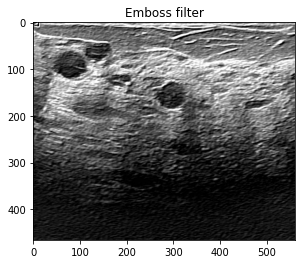

In [15]:
# Read the image
img = cv2.imread('Tumor\\images\\images\\9445.png')

# Define the kernel for the Emboss Filter
kernel = np.array([[-1, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 1]])

# Apply the Emboss Filter
emboss = cv2.filter2D(img, -1, kernel)
plt.title('Emboss filter')
# Display the resulting image
plt.imshow(emboss)

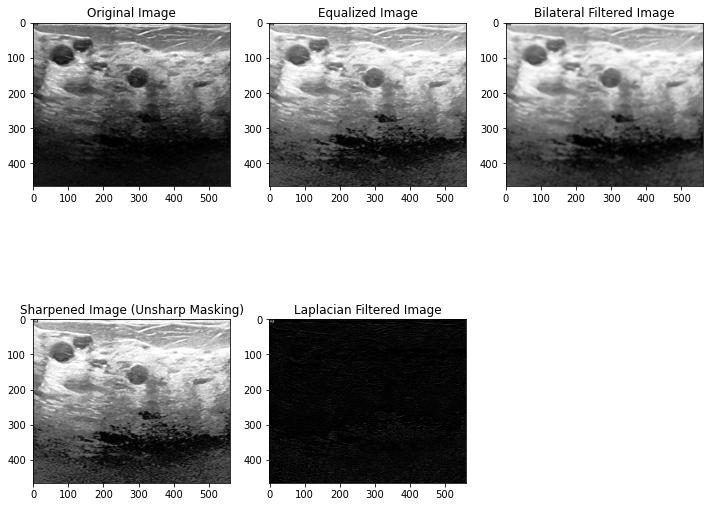

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('Tumor\\images\\images\\9445.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(equalized_image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply Unsharp Masking filter for sharpening
sharpened_image = cv2.addWeighted(equalized_image, 1.5, bilateral_filtered_image, -0.5, 0)

# Apply Laplacian filter for edge enhancement
laplacian_filtered_image = cv2.Laplacian(sharpened_image, cv2.CV_8U)

# Display the original, equalized, bilateral filtered, sharpened, and Laplacian filtered images using matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 3, 3)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral Filtered Image')

plt.subplot(2, 3, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Unsharp Masking)')

plt.subplot(2, 3, 5)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


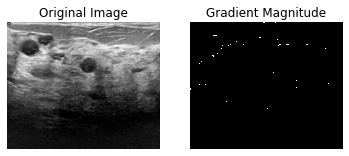

In [4]:

img = cv2.imread('Tumor\\images\\images\\9445.png')

# Apply the Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradients
gradient_magnitude = np.sqrt(sobel_x*2 + sobel_y*2)

# Display the original image and the gradient magnitude
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.axis('off')
plt.show()

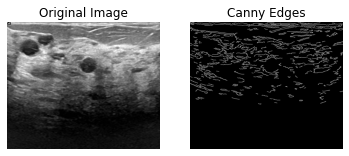

In [5]:
# Apply the Canny edge detection filter
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Display the original image and the detected edges
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')
plt.show()

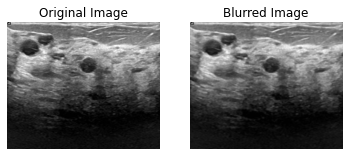

In [6]:
# Adjust the kernel size as needed
kernel_size = (5, 5)

# Apply the Gaussian Filter
blurred = cv2.GaussianBlur(img, kernel_size, 0)

# Display the original image and the blurred image
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image'), plt.axis('off')
plt.show()

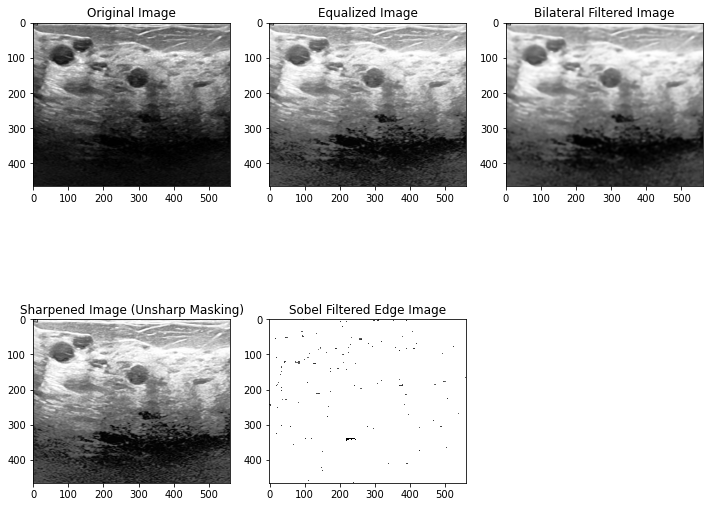

In [7]:
# Load the image in grayscale
image = cv2.imread('Tumor\\images\\images\\9445.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(equalized_image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply Unsharp Masking filter for sharpening
sharpened_image = cv2.addWeighted(equalized_image, 1.5, bilateral_filtered_image, -0.5, 0)

# Apply Sobel filter for edge detection
sobel_x = cv2.Sobel(sharpened_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(sharpened_image, cv2.CV_64F, 0, 1, ksize=3)
edge_image = np.sqrt(sobel_x*2 + sobel_y*2)

# Display the original, equalized, bilateral filtered, sharpened, and Sobel filtered edge images using matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 3, 3)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral Filtered Image')

plt.subplot(2, 3, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Unsharp Masking)')

plt.subplot(2, 3, 5)
plt.imshow(edge_image, cmap='gray')
plt.title('Sobel Filtered Edge Image')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


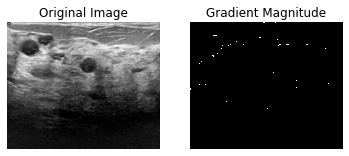

In [8]:
# Apply the Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradients
gradient_magnitude = np.sqrt(sobel_x*2 + sobel_y*2)

# Display the original image and the gradient magnitude
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.axis('off')
plt.show()

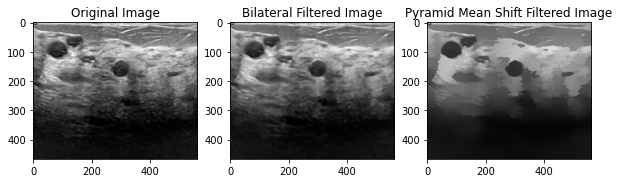

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Tumor\\images\\images\\9445.png')

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Apply pyramid mean shift filter
shifted_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)

# Display the original, bilateral filtered, and pyramid mean shift filtered images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Bilateral Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(shifted_image, cv2.COLOR_BGR2RGB))
plt.title('Pyramid Mean Shift Filtered Image')

plt.show()


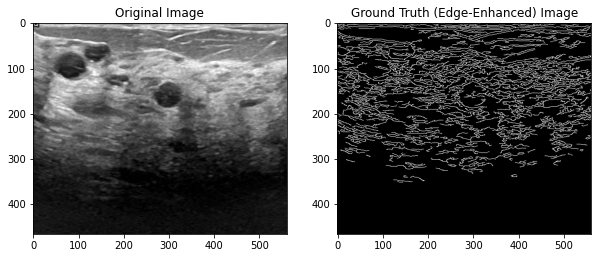

In [120]:
image = cv2.imread('Tumor\\images\\images\\9445.png')
# Simulate ground truth by enhancing edges
edge_enhanced_image = cv2.Canny(image, threshold1=50, threshold2=150)

# Display the original and ground truth (edge-enhanced) images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edge_enhanced_image, cmap='gray')
plt.title('Ground Truth (Edge-Enhanced) Image')

plt.show()

# -------------------------------------------------------------------------------------

### Apply filters 

In [125]:
collection = "Tumor\\images\\images\\Train\\train\\output\\"
for filename in os.listdir(collection):
    path = collection + filename
    image = cv2.imread(path)
    shifted_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
    cv2.imwrite(path, shifted_image)


In [126]:
collection = "Tumor\\images\\images\\Train\\train\\"
for filename in os.listdir(collection):
    path = collection + filename
    try:

        image = cv2.imread(path)
        shifted_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
        cv2.imwrite(path, shifted_image)
    except:
        pass


In [ ]:
os.makedirs("Tumor\\images\\images\\Test", exist_ok=True)
collection = "Tumor/images/images/"

for i, filename in enumerate(os.listdir(collection)):
    if int(filename[:4]) in test.Id.values:
        try:
            shutil.copy('Tumor/images/images/'+filename, 'Tumor/images/images/Test/'+filename)
        except:
            pass

In [245]:
for img in tqdm(os.listdir('Tumor\\images\\images\\Test')):
    path = 'Tumor\\images\\images\\Test\\' + img
    image = cv2.imread(path)
    resized = cv2.resize(image,(256,256),interpolation=cv2.INTER_AREA)
    cv2.imwrite(path, resized)

100%|███████████████████████████████████████████████████████████████████████████████| 229/229 [00:01<00:00, 116.32it/s]


In [135]:
collection = "Tumor\\images\\images\\Test\\"
for filename in os.listdir(collection):
    path = collection + filename
    try:
        image = cv2.imread(path)
        shifted_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51)
        cv2.imwrite(path, shifted_image)
    except:
        pass

In [147]:
collection = "Tumor/images/images/Train/train/output/"
for filename in tqdm(os.listdir(collection)):
    shutil.copy(collection+filename, 'Tumor/images/images/Train/train/'+filename)

100%|████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:00<00:00, 2841.07it/s]


In [171]:
# Specify the path of the file you want to delete
file_path = 'Tumor/images/images/Train/train/output/'
try:
    shutil.rmtree(file_path)
    print("Folder deleted successfully.")
except OSError as e:
    print(f"Error: {e}")


Folder deleted successfully.


# -----------------------------------------------------------------------

# Feature Extraction 

In [184]:
from skimage.feature import hog

In [241]:
all_train = {'featuers':[],
             'Class':[]}

In [242]:
for filename in tqdm(os.listdir('D:/kaggle projects/Tumor/images/images/Train/train/')):
    image = cv2.imread('D:\\kaggle projects\\Tumor\\images\\images\\Train\\train\\'+filename,0)
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    all_train['featuers'].append(features)
    all_train['Class'].append(train[ train.Id == int(filename[:4]) ].Class.values[0])


100%|██████████████████████████████████████████████████████████████████████████████| 1561/1561 [05:45<00:00,  4.51it/s]


In [246]:
all_test ={'featuers':[],
           'Id':[]}

In [247]:
for filename in tqdm(os.listdir('Tumor\\images\\images\\Test')):
    image = cv2.imread('Tumor\\images\\images\\Test\\'+filename,0)
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    all_test['featuers'].append(features)
    all_test['Id'].append(filename[:4])

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [00:47<00:00,  4.78it/s]


In [252]:
Feature_TrainXY = pd.DataFrame([i for i in tqdm(all_train['featuers'])])
Feature_TrainXY['Class'] = all_train['Class']

100%|██████████████████████████████████████████████████████████████████████████████████████| 1561/1561 [00:00<?, ?it/s]


In [253]:
Feature_Test = pd.DataFrame([i for i in tqdm(all_test['featuers'])])
Feature_Test['Id'] = all_test['Id']

100%|████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<?, ?it/s]


In [258]:
X = Feature_TrainXY.iloc[:,:-1]
y = Feature_TrainXY.iloc[:,-1]

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True,stratify=y)

In [265]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

# Create an SVM model
svm_model = SVC(
    C=2.0,            
    kernel='poly',     
    degree=2,
    class_weight={'Benign': 0.2, 'Malignant': 0.3, 'Normal': 0.6}
)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [266]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('F1-Score: ',f1_score(y_test, y_pred,average=None))

Accuracy: 0.6332622601279317
Classification Report: 
               precision    recall  f1-score   support

      Benign       0.65      0.83      0.73       259
   Malignant       0.59      0.53      0.56       135
      Normal       0.56      0.13      0.22        75

    accuracy                           0.63       469
   macro avg       0.60      0.50      0.50       469
weighted avg       0.62      0.63      0.60       469

Confusion Matrix: 
 [[215  39   5]
 [ 60  72   3]
 [ 54  11  10]]
F1-Score:  [0.73129252 0.56031128 0.21505376]


# ----------------------------------------------------------------------------

In [270]:
# Downsampling function
# Downsample the input 'DataFrame' by balancing the class distribution.
def returnbalanceData(data,target,min_class):
    
    classes = dict(data[target].value_counts())
    data.reindex()
    index = np.array([])
    for clas in classes:
        class_index = data[data[target] == clas].index
        sample=list(np.random.choice(class_index,classes[min_class],replace=False))
        
        index = np.concatenate((sample,index))
        
    return data.iloc[index,:]

In [273]:
# New_ = returnbalanceData(Feature_TrainXY,'Class','Normal')

In [283]:
# X = New_.iloc[:,:-1]
# y = New_.iloc[:,-1]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [285]:
# Create an SVM model
svm_model = SVC(
    C=2.0,            # Regularization parameter (default: 1.0)
    kernel='poly',     # Kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.)
    degree=2,         # Degree of the polynomial kernel function (if using 'poly')
    # gamma='0.001',    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid' (default: 'scale')
#     class_weight={'Benign': 0.2, 'Malignant': 0.3, 'Normal': 0.6}# Weights associated with classes
)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [286]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('F1-Score: ',f1_score(y_test, y_pred,average=None))

Accuracy: 0.4577777777777778
Classification Report: 
               precision    recall  f1-score   support

      Benign       0.38      0.59      0.46        61
   Malignant       0.54      0.47      0.51        80
      Normal       0.49      0.35      0.41        84

    accuracy                           0.46       225
   macro avg       0.47      0.47      0.46       225
weighted avg       0.48      0.46      0.46       225

Confusion Matrix: 
 [[36 10 15]
 [27 38 15]
 [33 22 29]]
F1-Score:  [0.45859873 0.50666667 0.40559441]


In [288]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

# Create an SVM model
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")


Best Parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Accuracy: 0.47


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'class_weight': [{'Benign': 0.2, 'Malignant': 0.3, 'Normal': 0.6}]
}

# Create an SVM model
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")


In [281]:
# Create a Random Forest Classifier model
rfc = RandomForestClassifier(class_weight= None, min_samples_leaf = 1, min_samples_split = 2, criterion = 'gini', bootstrap=False, max_depth=20, max_features='auto', n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=200, random_state=42)

In [282]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('F1-Score: ',f1_score(y_test, y_pred,average=None))

Accuracy: 0.4577777777777778
Classification Report: 
               precision    recall  f1-score   support

      Benign       0.38      0.74      0.51        61
   Malignant       0.57      0.42      0.49        80
      Normal       0.50      0.29      0.36        84

    accuracy                           0.46       225
   macro avg       0.48      0.48      0.45       225
weighted avg       0.49      0.46      0.45       225

Confusion Matrix: 
 [[45  8  8]
 [30 34 16]
 [42 18 24]]
F1-Score:  [0.50561798 0.48571429 0.36363636]


 # -----------------------------

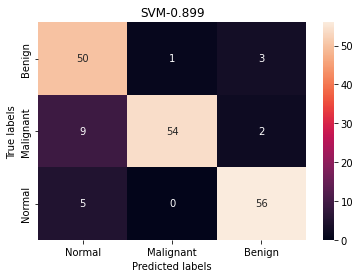

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap( [[50 , 1  ,3],
 [ 9, 54 , 2],
 [ 5 , 0 ,56]], annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVM-0.899'); 
ax.xaxis.set_ticklabels(['Normal', 'Malignant','Benign']); ax.yaxis.set_ticklabels(['Benign', 'Malignant','Normal']);